<a href="https://colab.research.google.com/github/DCDPUAEM/DCDP/blob/main/01%20Programaci%C3%B3n%20en%20Python/notebooks/exercises/Practica5_Estadistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   Pablo Calderon
*   Jean Tovar
*   Jesus Solano
*   Arturo Goméz


----

<h1><center>Monte Carlo</center></h1>
    
    
El algoritmo se basa en el muestreo aleatorio repetido en un intento de determinar la probabilidad. Esto significa simular un evento con entradas aleatorias un gran número de veces para obtener su estimación. 
    
Las simulaciones Monte Carlo se pueden utilizar en una amplia gama de campos que van desde la economía, el juego, la ingeniería, la energía y cualquier otro campo intermedio. Por lo tanto, no importa en qué campo profesional se encuentre, es algo excelente que debe conocer.

---

Al aprender a construir simulaciones Monte Carlo, es mejor comenzar con un modelo básico para comprender los fundamentos. La forma más fácil y común de hacerlo es con juegos simples, por lo que utilizaremos un juego de dados en este caso. 

Probablemente haya escuchado el dicho, "la casa siempre gana", así que para este ejemplo, la casa (típicamente un casino) tendrá una ventaja, y mostraremos lo que eso significa para las posibles ganancias del jugador.



## El juego de dados

Nuestro juego simple involucrará dos dados de seis caras. P

ara ganar, el jugador debe sacar el mismo número en ambos dados. 

Un dado de seis caras tiene seis resultados posibles (1, 2, 3, 4, 5 y 6). Con dos dados, ahora hay 36 resultados posibles (1 y 1, 1 y 2, 1 y 3, etc., o 6 x 6 = 36 posibilidades). 

En este juego, la casa tiene más oportunidades de ganar (30 resultados frente a los 6 resultados del jugador), lo que significa que la casa tiene bastante ventaja.

---

Digamos que nuestro jugador comienza con un saldo de 1,000 y está preparado para perderlo todo, por lo que apuesta 1 en cada tirada (lo que significa que se tiran ambos dados) y decide jugar 1,000 tiradas. Debido a que la casa es tan generosa, ofrecen pagar 4 veces la apuesta del jugador cuando el jugador gana. 

Por ejemplo, si el jugador gana la primera tirada, su saldo aumenta en $4 y finaliza la ronda con un saldo de 1,004. Si milagrosamente lograban una racha de 1000 victorias, podrían irse a casa con 5000. Si perdía todas las rondas, podrían irse a casa sin nada. No es una mala relación riesgo-recompensa… o tal vez lo sea.

In [ ]:
# Importando paqueterias
import matplotlib.pyplot as plt
import random

Ahora, debemos definir nuestra función que genere valores entre 1 y 6 para ambos dados. Podemos auxiliarnos con la funcion *random.randinit()*

Tomando en consideración la condición de que si el dado 1 es identico al dado 2, tendremos un resultado positivo en la apuesta, caso contrario, tendremos una derrota.

In [ ]:
dado1 = random.randint(1,6)
dado1

1

In [ ]:
# Creando funcion de lanzamiento de dados
def roll_dice():

    dado1 = random.randint(1,6)
    dado2 = random.randint(1,6)
    if dado1 ==dado2: 
      same_num=True
    else:
      same_num=False
    #print(dado1)
    #print(dado2)

    return same_num

In [ ]:
roll_dice()

False

Cada simulación Monte Carlo requerirá que sepa cuáles son sus entradas y qué información está buscando obtener. 

En esta práctica, ya definimos cuáles son nuestras entradas cuando describimos el juego. **Dijimos que nuestra cantidad de tiradas por juego es 1,000, y la cantidad que el jugador apostará en cada tirada es $1**. 

Además de nuestras variables de entrada, necesitamos definir cuántas veces queremos simular el juego. Podemos usar la variable num_simulations como nuestro conteo de simulación de Monte Carlo. Cuanto más alto hagamos este número, más precisa será la probabilidad predicha de su valor real.

La cantidad de variables que podemos rastrear generalmente aumenta con la complejidad de un proyecto, por lo que es importante precisar sobre qué información deseamos trabajar. 

Para este caso, realizaremos un seguimiento de la probabilidad de ganar (ganancias por juego divididas por el número total de tiradas) y el saldo final para cada simulación (o juego). Estos se inicializan como listas y se actualizarán al final de cada juego.

El saldo final es: 1324
La probabilidad de ganar es: 0.162


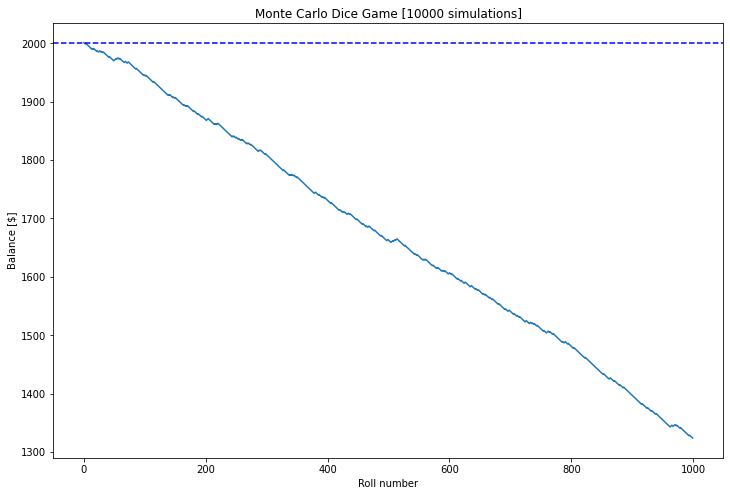

In [ ]:
# Entradas
num_simulations = 10000 #Valor dado
max_num_rolls = 1000
bet = 1

# Seguimiento
total_money=2000
num_of_plays = []
money = []
play = 1
wins=0

for play in range(max_num_rolls):
        #Victoria
        if roll_dice():
            #Sumar lo ganado
            total_money = total_money + bet
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)
            wins=wins+1

        #Perdida
        else:
            #restar lo perdido
            total_money = total_money - bet
            #agregar valores al arreglo de veces jugadas
            num_of_plays.append(play)
            #agregar lo ganado
            money.append(total_money)

plt.figure(figsize=(12,8))
plt.title('Monte Carlo Dice Game [10000 simulations]')
plt.ylabel("Balance [$]")
plt.xlabel("Roll number")
plt.plot(num_of_plays, money)
plt.axhline(y=2000, color='b', linestyle='--')
#plt.xlim(100,800)

win_probability = wins/max_num_rolls
end_balance = money[-1]
print("El saldo final es:", end_balance)
print("La probabilidad de ganar es:", win_probability)



### Configuración de la figura

El siguiente paso es configurar nuestra figura antes de ejecutar la simulación. Al hacer esto antes de la simulación, nos permite agregar líneas a nuestra figura después de cada juego. Luego, una vez que hayamos ejecutado todas las simulaciones, podemos mostrar la gráfica para mostrar nuestros resultados.

In [ ]:
#LA figura se configuro arriba
# Creando figura para los ejemplos de simulacion
#fig = #<COMPLETA>
#plt.#<COMPLETA>
#plt.#<COMPLETA>
#plt.#<COMPLETA>
#plt.xlim(#<COMPLETA>)

En el siguiente código, tenemos un bucle for externo que itera a través de nuestro número predefinido de simulaciones (10 000 simulaciones) y un bucle while anidado que ejecuta cada juego (1000 tiradas). 

Antes de comenzar cada ciclo while, inicializamos el saldo del jugador como $1,000 (como una lista para fines de trazado) y un conteo de tiradas y ganancias.

    * Nuestro bucle while simulará el juego durante 1000 tiradas. Dentro de este bucle, lanzamos los dados y usamos la variable booleana devuelta por roll_dice() para determinar el resultado. Si los dados son del mismo número, agregamos 4 veces la apuesta a la lista de saldo y agregamos una ganancia al conteo de ganancias. Si los dados son diferentes, restamos la apuesta de la lista de saldo. Al final de cada lanzamiento, agregamos un conteo a nuestra lista num_rolls.

Una vez que el número de lanzamientos llega a 1000, podemos calcular la probabilidad de ganar del jugador como el número de ganancias dividido por el número total de lanzamientos. 

También podemos almacenar el saldo final del juego completo en la variable de seguimiento end_balance. Finalmente, podemos trazar las variables num_rolls y balance para agregar una línea a la figura que definimos anteriormente.

In [ ]:
# For para ejecutar todas las simulaciones deseadas
#for i in range(#<COMPLETA>):
#   balance = #<COMPLETA>
#    num_rolls = #<COMPLETA>
#    num_wins = #<COMPLETA>
#    
#    while num_rolls[-1] < max_num_rolls:
#        #<COMPLETA>     
#
#        num_rolls.append(num_rolls[-1] + 1)# Store tracking variables and add line to figure
#    win_probability.#<COMPLETA>
#    end_balance.#<COMPLETA>
#   plt.plot(#<COMPLETA>)
# Configurado abajo

In [ ]:
# Entradas
num_simulations = 10000 #Valor dado
end_balance = 0
def play(total_money,bet,max_num_rolls):
  # Seguimiento
  num_of_plays = []
  money = []
  play = 1
  wins = 0
  

  for play in range(max_num_rolls):
         
    if roll_dice():
      #Sumar lo ganado
      total_money = total_money + bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)
      wins=wins+1

          
    else:
      #restar lo perdido
      total_money = total_money - bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)

  #plt.figure(figsize=(12,8))
  plt.title('Monte Carlo Dice Game [' + str(num_simulations) + ' simulations]')
  plt.ylabel("Balance [$]")
  plt.xlabel("Roll number")
  plt.plot(num_of_plays, money)
  
    
    

  win_probability = wins/max_num_rolls
  end_balance = money[-1]

  return(end_balance, win_probability)



Saldo final es: 334
probabilidad de ganar: 0.167


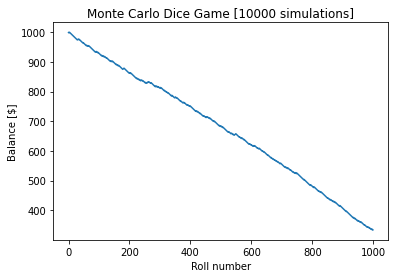

In [ ]:
a,b = play(1000,1,1000)
print("Saldo final es:", a)
print('probabilidad de ganar:', b)

In [ ]:
ending_fund = []
ending_fund.extend('a')
type(ending_fund)

list

Promedio de victorias despues de 1000 simulaciones: 0.16697100000000034
Saldo promedio despues de 1000 simulaciones: $333.942


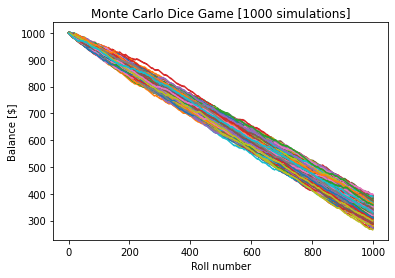

In [ ]:
ending_fund = []
win_probs =[]
num_simulations=1000
for i in range(num_simulations):
    a,b=play(1000,1,1000)
    ending_fund.append(a)
    win_probs.append(b)

#print(ending_fund)
#print(win_probs)

overall_win_probability = sum(win_probs)/len(win_probs)
overall_end_balance = sum(ending_fund)/len(ending_fund)
 

print("Promedio de victorias despues de " + str(num_simulations) + " simulaciones: " + str(overall_win_probability))
print("Saldo promedio despues de " + str(num_simulations) + " simulaciones: $" + str(overall_end_balance))

#print("El overall end balance es:", sum(ending_fund)/len(end_balance))
#print("El overall win probability es:",sum(win_probs)/len(win_probs))



## Desafio complementario

Ahora, realiza el mismo procedimiento pero mostrando los 
resultados para 10, 100, 1000 y 10000 lanzamientos, considerando 200, 2000 y 20000 simulaciones.

Como bien sabemos, cada que gana el individuo, la casa le pagaba 4 veces el valor de la apuesta.
Ahora, si gana, le pagaran 6 veces mas de lo apostado, siempre y cuando el individuo apueste de 3 en 3.

El monto inicial sería ahora de 800. ¿Cuánta diferencia existe entre los resultados obtenidos para cada escenario?
¿En cuales se tiene un porcentaje mayor de victoria? 

Grafica estos resultados utilizando graficas de pastel y de barras y realiza una comparación entre ellos. 

In [ ]:
# Entradas
def play1(total_money,bet,max_num_rolls):
  # Seguimiento
  num_of_plays = []
  money = []
  play = 1
  wins=0
  

  for play in range(max_num_rolls):
         
    if roll_dice():
      #Sumar lo ganado
      total_money = total_money + 4*bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)
      wins=wins+1

          
    else:
      #restar lo perdido
      total_money = total_money - bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)

  #plt.figure(figsize=(12,8))
  plt.title('Monte Carlo Dice Game [' + str(num_simulations) + ' simulations]')
  plt.ylabel("Balance [$]")
  plt.xlabel("Roll number")
  plt.plot(num_of_plays, money)
  
    
    

  win_probability = wins/max_num_rolls
  end_balance = money[-1]

  return(end_balance,win_probability)
  
def play2(total_money,bet,max_num_rolls):
  # Seguimiento
  num_of_plays = []
  money = []
  play = 1
  wins=0
  

  for play in range(max_num_rolls):
         
    if roll_dice() & bet == 3:
      #Sumar lo ganado
      total_money = total_money + 6*bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)
      wins=wins+1
    
    if roll_dice():
      #Sumar lo ganado
      total_money = total_money + 4*bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)
      wins=wins+1

          
    else:
      #restar lo perdido
      total_money = total_money - bet
      #agregar valores al arreglo de veces jugadas
      num_of_plays.append(play)
      #agregar lo ganado
      money.append(total_money)

  #plt.figure(figsize=(12,8))
  plt.title('Monte Carlo Dice Game [' + str(num_simulations) + ' simulations]')
  plt.ylabel("Balance [$]")
  plt.xlabel("Roll number")
  plt.plot(num_of_plays, money)
  
    
    

  win_probability = wins/max_num_rolls
  end_balance = money[-1]

  return(end_balance,win_probability)

Mean wins with 200 simulations: 0.16850
Mean budget with 200 simulations: $993.37000
Mean wins with 200 simulations: 0.16640
Mean budget with 200 simulations: $933.28000
Mean wins with 200 simulations: 0.16686
Mean budget with 200 simulations: $333.71000
Mean wins with 200 simulations: 0.16680
Mean budget with 200 simulations: $-5664.07000


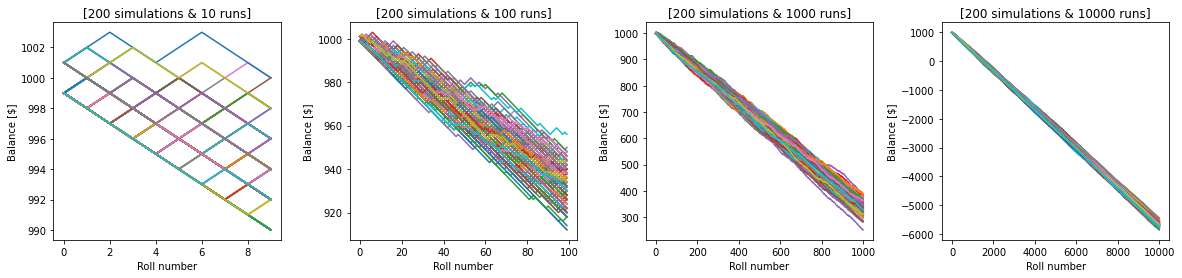

In [ ]:
num_simulations=200
runs = [10, 100, 1000, 10000]
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_figwidth(20)
r = len(runs)
for j in range(1, r + 1):
    ending_fund = []
    win_probs =[]
    fig.add_subplot(1,a,j )
    for i in range(num_simulations):
        x=play(1000,1,runs[j-1])
        ending_fund.append(x[0])
        win_probs.append(x[1])
        plt.title('[' + str(num_simulations) + ' simulations & ' + str(runs[j-1]) +' runs]')
    overall_win_probability = sum(win_probs)/len(win_probs)
    overall_end_balance = sum(ending_fund)/len(ending_fund)
  
    print("Mean wins with " + str(num_simulations) + " simulations: " + '%.5f' % overall_win_probability )
    print("Mean budget with " + str(num_simulations) + " simulations: $" + '%.5f' % overall_end_balance)

Mean wins with 2000 simulations: 0.16670
Mean budget with 2000 simulations: $993.33400
Mean wins with 2000 simulations: 0.16727
Mean budget with 2000 simulations: $933.45500
Mean wins with 2000 simulations: 0.16659
Mean budget with 2000 simulations: $333.18400
Mean wins with 2000 simulations: 0.16658
Mean budget with 2000 simulations: $-5668.45300


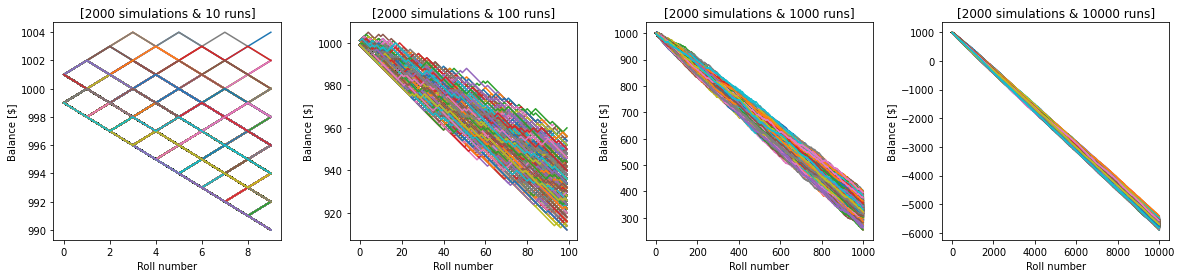

In [ ]:
num_simulations=2000
runs = [10, 100, 1000, 10000]
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_figwidth(20)
r = len(runs)
for j in range(1, r + 1):
    ending_fund = []
    win_probs =[]
    fig.add_subplot(1,a,j )
    for i in range(num_simulations):
        x=play(1000,1,runs[j-1])
        ending_fund.append(x[0])
        win_probs.append(x[1])
        plt.title('[' + str(num_simulations) + ' simulations & ' + str(runs[j-1]) +' runs]')
    overall_win_probability = sum(win_probs)/len(win_probs)
    overall_end_balance = sum(ending_fund)/len(ending_fund)
  
    print("Mean wins with " + str(num_simulations) + " simulations: " + '%.5f' % overall_win_probability )
    print("Mean budget with " + str(num_simulations) + " simulations: $" + '%.5f' % overall_end_balance)

Mean wins with 20000 simulations: 0.16663
Mean budget with 20000 simulations: $993.33260
Mean wins with 20000 simulations: 0.16632
Mean budget with 20000 simulations: $933.26440
Mean wins with 20000 simulations: 0.16679
Mean budget with 20000 simulations: $333.58480
Mean wins with 20000 simulations: 0.16667
Mean budget with 20000 simulations: $-5666.55900


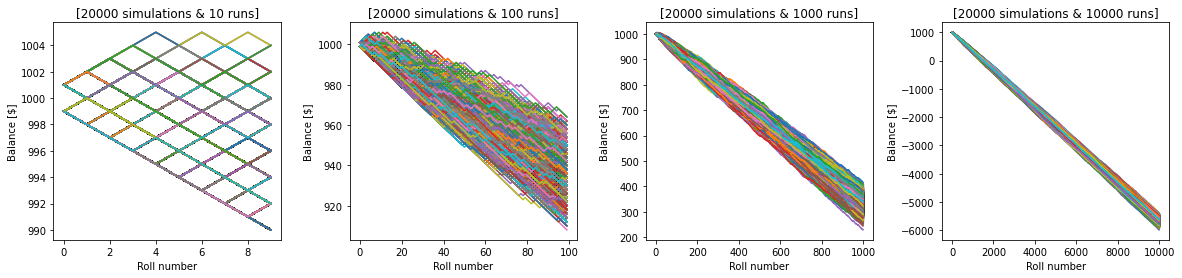

In [ ]:
num_simulations=20000
runs = [10, 100, 1000, 10000]
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_figwidth(20)
r = len(runs)
for j in range(1, r + 1):
    ending_fund = []
    win_probs =[]
    fig.add_subplot(1,a,j )
    for i in range(num_simulations):
        x=play(1000,1,runs[j-1])
        ending_fund.append(x[0])
        win_probs.append(x[1])
        plt.title('[' + str(num_simulations) + ' simulations & ' + str(runs[j-1]) +' runs]')
    overall_win_probability = sum(win_probs)/len(win_probs)
    overall_end_balance = sum(ending_fund)/len(ending_fund)
  
    print("Mean wins with " + str(num_simulations) + " simulations: " + '%.5f' % overall_win_probability)
    print("Mean budget with " + str(num_simulations) + " simulations: $" + '%.5f' % overall_end_balance)

In [ ]:
comp1_funds = []
comp2_funds = []
comp1_wins = []
comp2_wins = []

Promedio de victorias para play1 : 0.16654 
Saldo promedio para play1 $ 333.07200 
Promedio de victorias para play2 : 0.16628 
Saldo promedio para play2 $ 831.41500 
Promedio de victorias para play3 : 0.16633 
Saldo promedio para play3 $ 495.01000 


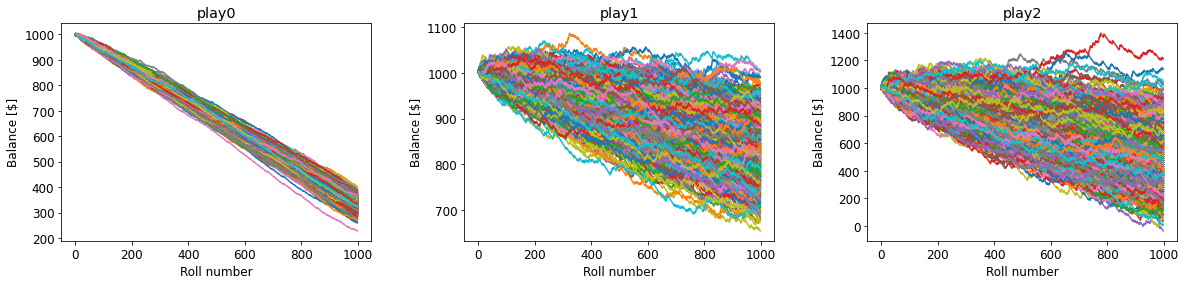

In [ ]:
num_simulations=1000

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_figwidth(20)
a = [play, play1, play2]
c = [1, 1, 3]
b = 1
for j in range(3):
    fig.add_subplot(1,3,b)
    ending_fund = []
    win_probs =[]
    for i in range(num_simulations):
        x = a[j](1000,c[j],1000)
        ending_fund.append(x[0])
        win_probs.append(x[1])
        plt.title('play'+ str(j))

    overall_win_probability = sum(win_probs)/len(win_probs)
    overall_end_balance = sum(ending_fund)/len(ending_fund)
    comp1_funds.append(overall_end_balance)
    comp1_wins.append(overall_win_probability)
    print("Promedio de victorias para play" + str(b) + ' : %.5f ' % overall_win_probability )
    print("Saldo promedio para play" + str(b) + ' $ %.5f ' % overall_end_balance)
    b = b+1

Promedio de victorias para play1 : 0.16660 
Saldo promedio para play1 $ 133.19400 
Promedio de victorias para play2 : 0.16737 
Saldo promedio para play2 $ 636.82500 
Promedio de victorias para play3 : 0.16733 
Saldo promedio para play3 $ 309.92000 


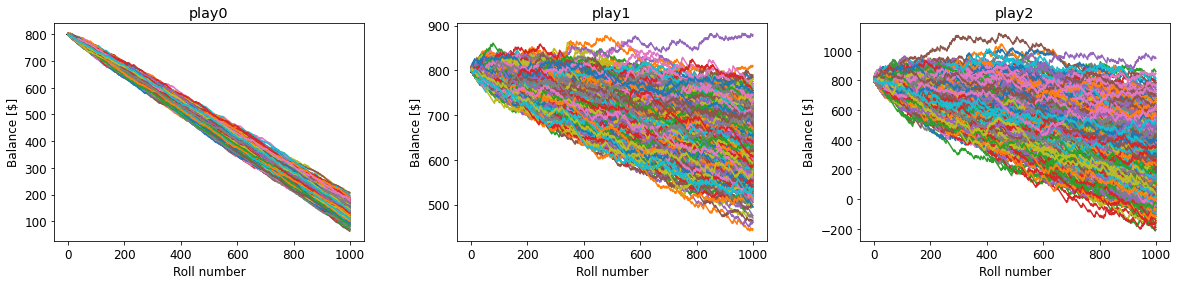

In [ ]:
num_simulations=1000

fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.set_figwidth(20)
a = [play, play1, play2]
c = [1, 1, 3]
b = 1
for j in range(3):
    fig.add_subplot(1,3,b)
    ending_fund = []
    win_probs =[]
    for i in range(num_simulations):
        x = a[j](800,c[j],1000)
        ending_fund.append(x[0])
        win_probs.append(x[1])
        plt.title('play'+ str(j))

    overall_win_probability = sum(win_probs)/len(win_probs)
    overall_end_balance = sum(ending_fund)/len(ending_fund)
    comp2_funds.append(overall_end_balance)
    comp2_wins.append(overall_win_probability)

    print("Promedio de victorias para play" + str(b) + ' : %.5f ' % overall_win_probability )
    print("Saldo promedio para play" + str(b) + ' $ %.5f ' % overall_end_balance)
    b = b+1

([<matplotlib.axis.YTick at 0x7f81937b7a60>,
 [Text(0, 0, 'play with pay 1'),
  Text(0, 1, 'play with pay 4'),
  Text(0, 2, 'play with pay 6')])

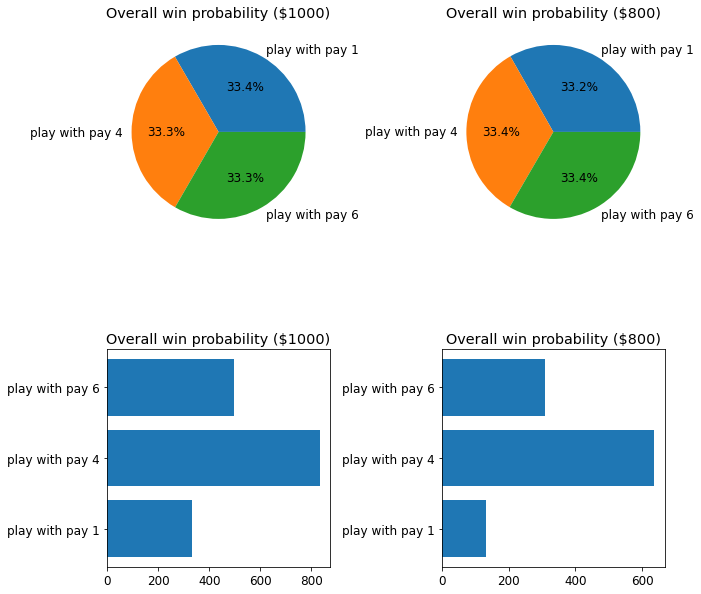

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
fig.set_figwidth(10)
fig.set_figheight(10)

fig.add_subplot(2,2,1)
plt.pie(comp1_wins, labels = ['play with pay 1', 'play with pay 4' ,'play with pay 6'], autopct='%1.1f%%')
plt.title('Overall win probability ($1000)')

fig.add_subplot(2,2,2)
plt.pie(comp2_wins,  labels = ['play with pay 1', 'play with pay 4' ,'play with pay 6'], autopct='%1.1f%%')
plt.title('Overall win probability ($800)')

bars = ('play with pay 1', 'play with pay 4' ,'play with pay 6')
y_pos = range(len(bars))
fig.add_subplot(2,2,3)
plt.barh(y_pos, comp1_funds )
plt.title('Overall win probability ($1000)')
plt.yticks(y_pos, bars)

fig.add_subplot(2,2,4)
plt.barh(y_pos, comp2_funds)
plt.title('Overall win probability ($800)')
plt.yticks(y_pos, bars)


## ¿Qué es web scrapping?

Es una técnica para recuperar grandes cantidades de datos de Internet.

-----

Existen diferentes técnicas como Scrappy, BeautifulSoup, etc. La librería más común es BeautifulSoup. 

Extrae la página Html de cualquier sitio web. Los datos almacenados por web Scrapping son un formato no estructurado. Convertimos los datos no estructurados en estructurados para el análisis y la exploración de datos.

------

### Bibliotecas utilizadas para Web Scraping

Como sabemos, Python se usa para varias aplicaciones y existen diferentes bibliotecas para diferentes propósitos. En nuestra demostración adicional, usaremos las siguientes bibliotecas:

   * BeautifulSoup: Beautiful Soup es un paquete de Python para analizar documentos HTML y XML. Crea árboles de análisis que son útiles para extraer los datos fácilmente.
   * Pandas: Pandas es una biblioteca que se utiliza para la manipulación y el análisis de datos. Se utiliza para extraer los datos y almacenarlos en el formato deseado.
   * Utilice matplotlib y seaborn para la visualización de datos

------
### ¿Cómo funciona el Web Scraping?

Cuando ejecuta el código para web scraping, se envía una solicitud a la URL que ha mencionado. Como respuesta a la solicitud, el servidor envía los datos y le permite leer la página HTML o XML. Luego, el código analiza la página HTML o XML, encuentra los datos y los extrae.

Para extraer datos utilizando web scraping con Python, debe seguir estos pasos básicos:

   * Busque la URL que desea raspar
   * Inspecciona la página
   * Encuentra los datos que quieres extraer
   * Escribe el codigo
   * Ejecute el código y extraiga los datos
   * Almacene los datos en el formato requerido

------

-------

### Datos del sitio web de Flipkart

Para comprobar cuál debería ser el precio óptimo de nuestro producto, estos precios pueden variar mucho. Entonces, vamos a mostrar cómo podemos obtener información relacionada con un producto en particular (computadora portátil).

Primero, importemos todas las bibliotecas necesarias:

In [ ]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

Los datos que extraemos son datos no estructurados. Por eso, crearemos listas vacías para almacenarlas de forma estructurada

In [ ]:
name=[]
prices=[]
ratings=[]
df = pd.DataFrame()

## Paso 1: busque la URL

Para este ejemplo, vamos a **raspar** (Scrap) el sitio web de **Flipkart** para extraer el nombre, el precio y la calificación de las computadoras portátiles. La URL de esta página es:

[Flipkart](https://www.flipkart.com/search?q=laptops&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&as-pos=1&as-type=HISTORY.)